<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/T2I_OpenSource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sources

https://huggingface.co/DeepFloyd/IF-I-XL-v1.0

https://huggingface.co/CompVis/stable-diffusion-v1-4


Dependencies

In [ ]:
!pip install diffusers accelerate transformers safetensors  --quiet

!pip install colab-env --quiet

import colab_env
import os

access_token = os.getenv("HUGGINGFACE_ACCESS_TOKEN")


In [2]:
import torch
torch.__version__

'2.1.0+cu121'

Definitions

In [ ]:
from diffusers import DiffusionPipeline
from diffusers.utils import pt_to_pil
import torch

# stage 1
stage_1 = DiffusionPipeline.from_pretrained("DeepFloyd/IF-I-XL-v1.0", variant="fp16", torch_dtype=torch.float16, token=access_token)
#stage_1.enable_xformers_memory_efficient_attention()  # remove line if torch.__version__ >= 2.0.0
stage_1.enable_model_cpu_offload()

# stage 2
stage_2 = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-II-L-v1.0", text_encoder=None, variant="fp16", torch_dtype=torch.float16, token=access_token
)
#stage_2.enable_xformers_memory_efficient_attention()  # remove line if torch.__version__ >= 2.0.0
stage_2.enable_model_cpu_offload()

# stage 3
safety_modules = {"feature_extractor": stage_1.feature_extractor, "safety_checker": stage_1.safety_checker, "watermarker": stage_1.watermarker}
stage_3 = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-x4-upscaler", **safety_modules, torch_dtype=torch.float16, token=access_token)
#stage_3.enable_xformers_memory_efficient_attention()  # remove line if torch.__version__ >= 2.0.0
stage_3.enable_model_cpu_offload()


In [4]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")


Question: a photo of an astronaut riding a horse on mars



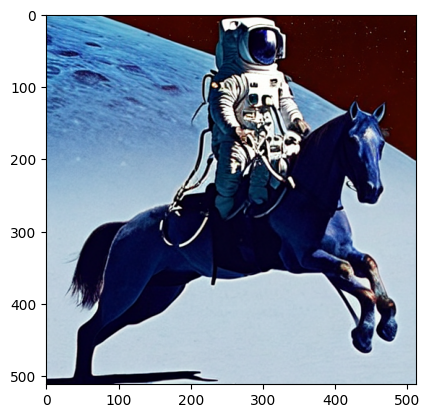

In [17]:
print('Question: %s'%prompt)
print()

image_path = '/content/astronaut_rides_horse.png'
testim = cv2.imread(image_path)
plt.imshow(testim)
plt.show()
print()

DeepFloyd-IF
https://huggingface.co/DeepFloyd/IF-I-XL-v1.0

In [10]:
prompt = 'a photo of a kangaroo wearing an orange hoodie and blue sunglasses standing in front of the eiffel tower holding a sign that says "very deep learning"'

# text embeds
prompt_embeds, negative_embeds = stage_1.encode_prompt(prompt)


Stage 1

In [8]:
generator = torch.manual_seed(0)

image = stage_1(prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_embeds, generator=generator, output_type="pt").images
pt_to_pil(image)[0].save("./if_stage_I.png")

  0%|          | 0/100 [00:00<?, ?it/s]

Question: a photo of a kangaroo wearing an orange hoodie and blue sunglasses standing in front of the eiffel tower holding a sign that says "very deep learning"



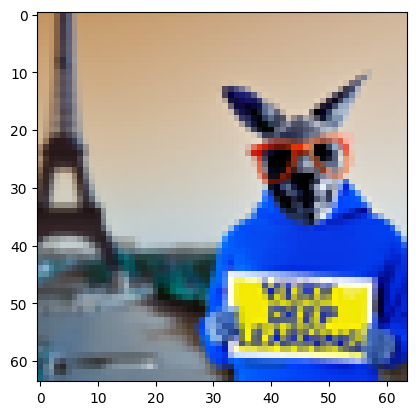

In [18]:
prompt = 'a photo of a kangaroo wearing an orange hoodie and blue sunglasses standing in front of the eiffel tower holding a sign that says "very deep learning"'
print('Question: %s'%prompt)
print()

image_path = '/content/if_stage_I.png'
testim = cv2.imread(image_path)
plt.imshow(testim)
plt.show()
print()

Stage 2

In [11]:
image = stage_2(
    image=image, prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_embeds, generator=generator, output_type="pt"
).images
pt_to_pil(image)[0].save("./if_stage_II.png")

  0%|          | 0/50 [00:00<?, ?it/s]

Question: a photo of a kangaroo wearing an orange hoodie and blue sunglasses standing in front of the eiffel tower holding a sign that says "very deep learning"



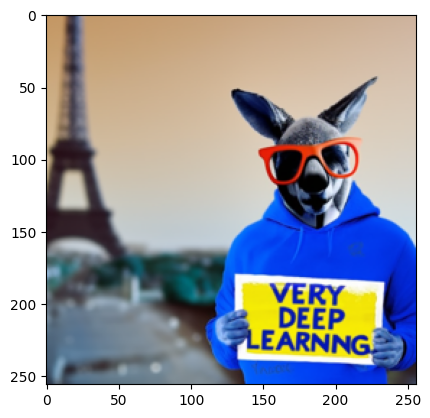

In [19]:
print('Question: %s'%prompt)
print()

image_path = '/content/if_stage_II.png'
testim = cv2.imread(image_path)
plt.imshow(testim)
plt.show()
print()

Stage 3

In [ ]:
image = stage_3(prompt=prompt, image=image, generator=generator, noise_level=100).images
image[0].save("./if_stage_III.png")

Question: a photo of a kangaroo wearing an orange hoodie and blue sunglasses standing in front of the eiffel tower holding a sign that says "very deep learning"



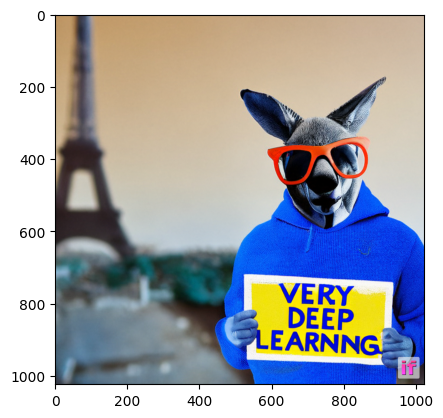

In [20]:
print('Question: %s'%prompt)
print()

image_path = '/content/if_stage_III.png'
testim = cv2.imread(image_path)
plt.imshow(testim)
plt.show()
print()